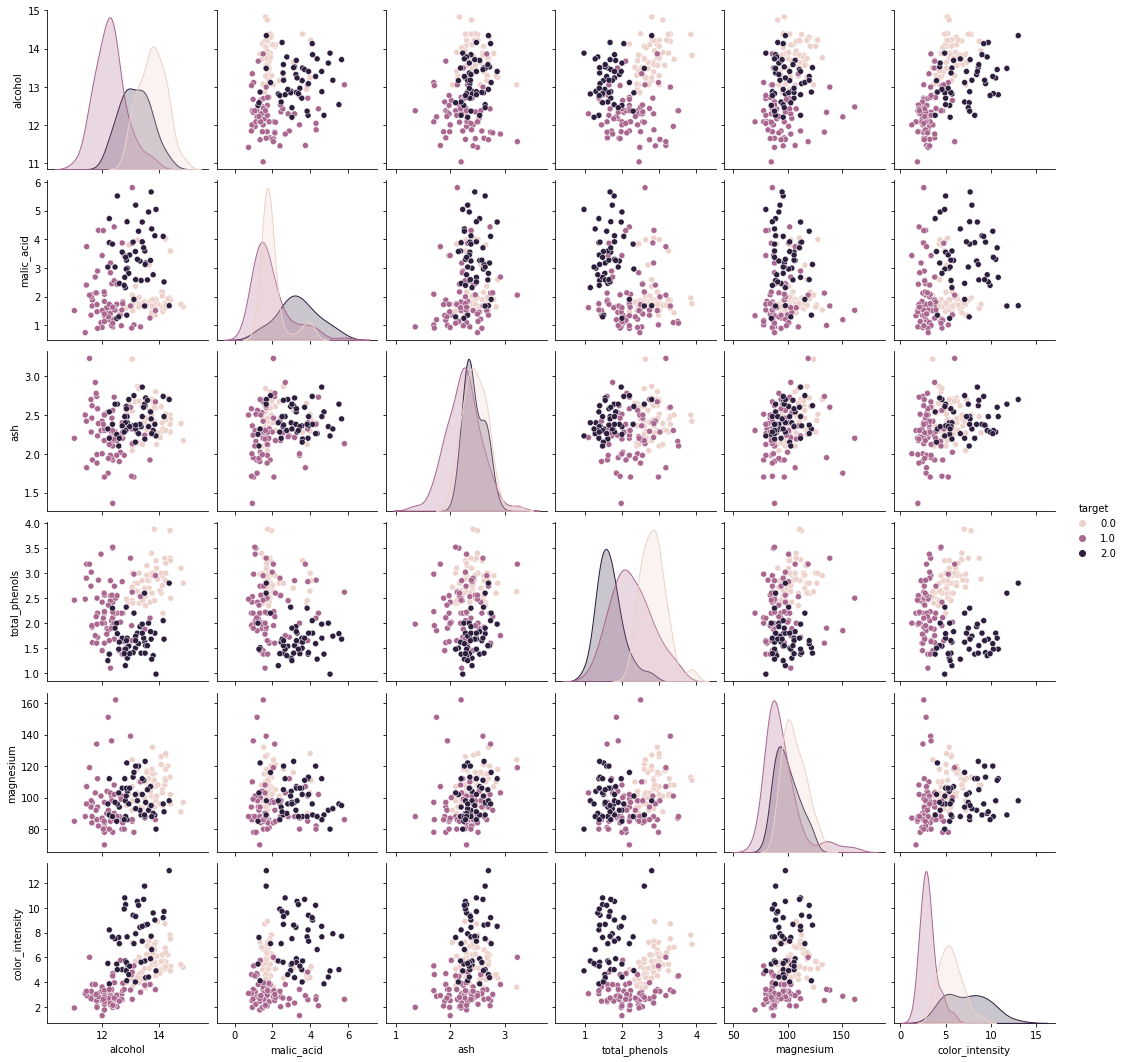

In [23]:
# K-means Clustering
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans 
import pandas as pd
import numpy as np
# load the iris datasets
wine = load_wine()
# fit a Kmeans model to the data 
model = KMeans(n_clusters=3) 
model.fit(wine.data)
data=pd.DataFrame(data=np.c_[wine['data'],wine['target']],columns=wine['feature_names']+['target'])

import matplotlib.pyplot as plt
import seaborn as sns

#pairplot
df=data[['alcohol','malic_acid','ash','total_phenols','magnesium','color_intensity','target']]
sns.pairplot(df,hue='target')


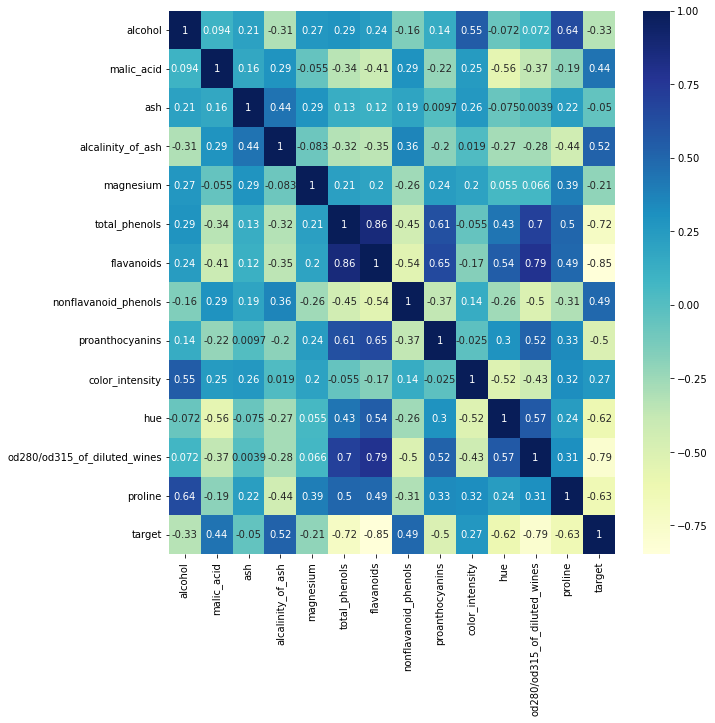

In [26]:
# import modules
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
  
# prints data that will be plotted
# columns shown here are selected by corr() since
# they are ideal for the plot
#print(data.corr())
  
# plotting correlation heatmap
fig, ax = plt.subplots(figsize=(10, 10))
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
  

KMeans(n_clusters=3)


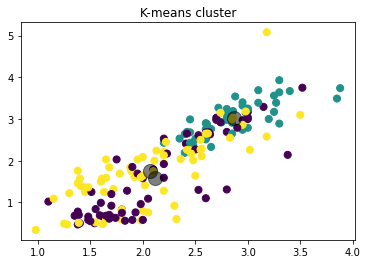

In [27]:
# K-means Clustering
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans 
# load the iris datasets
dataset = load_wine()
# fit a Kmeans model to the data 
model = KMeans(n_clusters=3) 
model.fit(dataset.data) 
print(model)
# Visualize the results 
import matplotlib.pyplot as plt 
X = dataset.data
y_kmeans = model.predict(X)
# scatter plot the petal length (column 2), petal width (column 3) 
plt.scatter(X[:, 5], X[:, 6], c=y_kmeans, s=50, cmap='viridis') 
# show centroid centres as grey circle opacity 50%
centers = model.cluster_centers_
plt.title("K-means cluster")
plt.scatter(centers[:, 5], centers[:, 6], c='black', s=200, alpha=0.5)

In [28]:
# Clustering silhouette_score
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
X = load_wine().data
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(X) 
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean') 

    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.6568536504294319
For n_clusters=3, The Silhouette Coefficient is 0.5711381937868844
For n_clusters=4, The Silhouette Coefficient is 0.5611347173642897
For n_clusters=5, The Silhouette Coefficient is 0.5489993239795691
For n_clusters=6, The Silhouette Coefficient is 0.5656413100386389
For n_clusters=7, The Silhouette Coefficient is 0.5574646654973129
For n_clusters=8, The Silhouette Coefficient is 0.5369954815914458
For n_clusters=9, The Silhouette Coefficient is 0.5287268772337241
For n_clusters=10, The Silhouette Coefficient is 0.5187886561561718


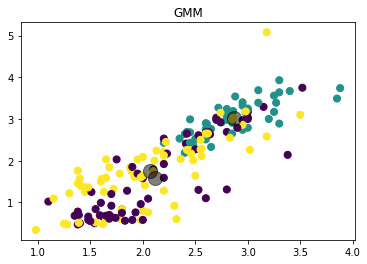

In [29]:
#GMM

from sklearn.mixture import GaussianMixture as GMM
gmm = GMM(n_components=3).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 5], X[:, 6], c=y_kmeans, s=50, cmap='viridis') 
# show centroid centres as grey circle opacity 50%
centers = model.cluster_centers_
plt.title("GMM")
plt.scatter(centers[:, 5], centers[:, 6], c='black', s=200, alpha=0.5)

In [31]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_wine
from sklearn.mixture import GaussianMixture as GMM

X = load_wine().data
S=[]

K = range(2, 11)

for n_cluster in K:
    model = GMM(n_components=n_cluster, n_init=20, init_params='kmeans')
    # Fit the model 
    labels = model.fit_predict(X)
    # Calculate Silhoutte Score and append to a list
    sil_coeff=silhouette_score(X, labels, metric='euclidean')
    S.append(silhouette_score(X, labels, metric='euclidean'))
    
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.5510515269549275
For n_clusters=3, The Silhouette Coefficient is 0.3472659005772159
For n_clusters=4, The Silhouette Coefficient is 0.33887497789025506
For n_clusters=5, The Silhouette Coefficient is 0.2494757551737161
For n_clusters=6, The Silhouette Coefficient is 0.3178934472880633
For n_clusters=7, The Silhouette Coefficient is 0.46882628384975
For n_clusters=8, The Silhouette Coefficient is 0.5081380498075135
For n_clusters=9, The Silhouette Coefficient is 0.4393965746794092
For n_clusters=10, The Silhouette Coefficient is 0.4914733567989809


In [32]:
import pandas as pd
import numpy as np

df = pd.io.parsers.read_csv(
    'https://raw.githubusercontent.com/rasbt/pattern_classification/master/data/wine_data.csv',
     header=None,
     usecols=[0,6,10]
    )

df.columns=['Class label', 'total_phenols', 'flavaniods']

df.head()

,Class label,total_phenols,flavaniods
0,1,2.80,5.64
1,1,2.65,4.38
2,1,2.80,5.68
3,1,3.85,7.80
4,1,2.80,4.32


In [33]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(df[['total_phenols', 'flavaniods']])
df_std = std_scale.transform(df[['total_phenols', 'flavaniods']])

df_std[0:5, :]

#minmax_scale = preprocessing.MinMaxScaler().fit(df[['Phenols', 'Color.int']])
#df_minmax = minmax_scale.transform(df[['Phenols', 'Color.int']])

#print('Mean after standardization:\nPhenols={:.2f}, Color.int={:.2f}'
#      .format(df_std[:,0].mean(), df_std[:,1].mean()))
#print('\nStandard deviation after standardization:\nPhenols={:.2f}, Color.int={:.2f}'
#      .format(df_std[:,0].std(), df_std[:,1].std()))
#print()
#print('Min-value after min-max scaling:\nPhenols={:.2f}, Color.int={:.2f}'
#      .format(df_minmax[:,0].min(), df_minmax[:,1].min()))
#print('\nMax-value after min-max scaling:\nPhenols={:.2f}, Color.int={:.2f}'
#      .format(df_minmax[:,0].max(), df_minmax[:,1].max()))

array([[ 0.80899739,  0.25171685],
       [ 0.56864766, -0.29332133],
       [ 0.80899739,  0.26901965],
       [ 2.49144552,  1.18606801],
       [ 0.80899739, -0.31927553]])

KMeans(n_clusters=3)


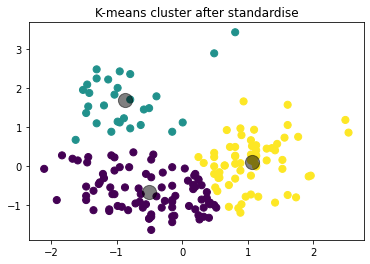

In [34]:
model = KMeans(n_clusters=3) 
model.fit(df_std) 
print(model)
# Visualize the results 
import matplotlib.pyplot as plt 
X = df_std
y_kmeans = model.predict(X)
# scatter plot the petal length (column 2), petal width (column 3) 
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis') 
# show centroid centres as grey circle opacity 50%
centers = model.cluster_centers_
plt.title("K-means cluster after standardise")
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [35]:
# Clustering silhouette_score
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans

for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(X) 
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean') 

    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.4052459462520335
For n_clusters=3, The Silhouette Coefficient is 0.43099749056912845
For n_clusters=4, The Silhouette Coefficient is 0.42555099208454056
For n_clusters=5, The Silhouette Coefficient is 0.38195090686063715
For n_clusters=6, The Silhouette Coefficient is 0.3866201595260322
For n_clusters=7, The Silhouette Coefficient is 0.4005452173467534
For n_clusters=8, The Silhouette Coefficient is 0.3827188854920095
For n_clusters=9, The Silhouette Coefficient is 0.35584033340152593
For n_clusters=10, The Silhouette Coefficient is 0.37922003953564276


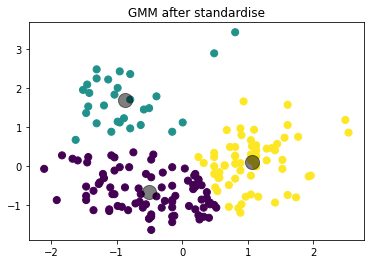

In [36]:
#GMM

from sklearn.mixture import GaussianMixture as GMM
gmm = GMM(n_components=3).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis') 
# show centroid centres as grey circle opacity 50%
centers = model.cluster_centers_
plt.title("GMM after standardise")
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [37]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_wine
from sklearn.mixture import GaussianMixture as GMM

S=[]

K = range(2, 11)

for n_cluster in K:
    model = GMM(n_components=n_cluster, n_init=20, init_params='kmeans')
    # Fit the model 
    labels = model.fit_predict(X)
    # Calculate Silhoutte Score and append to a list
    sil_coeff=silhouette_score(X, labels, metric='euclidean')
    S.append(silhouette_score(X, labels, metric='euclidean'))
    
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.40886341560830836
For n_clusters=3, The Silhouette Coefficient is 0.43878736970898025
For n_clusters=4, The Silhouette Coefficient is 0.37481400349434013
For n_clusters=5, The Silhouette Coefficient is 0.3441893377381337
For n_clusters=6, The Silhouette Coefficient is 0.3714147058515749
For n_clusters=7, The Silhouette Coefficient is 0.2858429135864348
For n_clusters=8, The Silhouette Coefficient is 0.23767161312138693
For n_clusters=9, The Silhouette Coefficient is 0.35419784541547683
For n_clusters=10, The Silhouette Coefficient is 0.27341971843023866


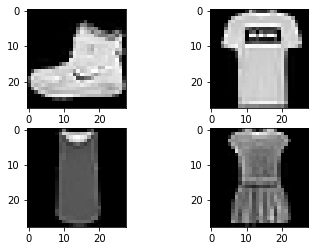

In [2]:
# MNIST dataset preparation

from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import tensorflow as tf

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [12]:
# MLP model (simple Neural Network, No convolution layers)

import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
import tensorflow as tf
# fix random seed for reproducibility
seed = 88
numpy.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# build the model
# create model
model = Sequential()
model.add(Dense(num_pixels, input_dim=num_pixels, 
                 kernel_initializer='normal', activation='relu'))
model.add(Dense(num_classes, 
                 kernel_initializer='normal', activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', 
    optimizer='adam', metrics=['accuracy'])

# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
    epochs=10, batch_size=200, verbose=2)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 - 2s - loss: 0.5150 - accuracy: 0.8190 - val_loss: 0.4763 - val_accuracy: 0.8320 - 2s/epoch - 8ms/step
Epoch 2/10
300/300 - 2s - loss: 0.3771 - accuracy: 0.8656 - val_loss: 0.4065 - val_accuracy: 0.8535 - 2s/epoch - 6ms/step
Epoch 3/10
300/300 - 2s - loss: 0.3348 - accuracy: 0.8789 - val_loss: 0.3653 - val_accuracy: 0.8690 - 2s/epoch - 6ms/step
Epoch 4/10
300/300 - 2s - loss: 0.3069 - accuracy: 0.8886 - val_loss: 0.3541 - val_accuracy: 0.8719 - 2s/epoch - 6ms/step
Epoch 5/10
300/300 - 2s - loss: 0.2850 - accuracy: 0.8962 - val_loss: 0.3503 - val_accuracy: 0.8734 - 2s/epoch - 6ms/step
Epoch 6/10
300/300 - 2s - loss: 0.2719 - accuracy: 0.9004 - val_loss: 0.3454 - val_accuracy: 0.8795 - 2s/epoch - 6ms/step
Epoch 7/10
300/300 - 2s - loss: 0.2598 - accuracy: 0.9030 - val_loss: 0.3283 - val_accuracy: 0.8829 - 2s/epoch - 6ms/step
Epoch 8/10
300/300 - 2s - loss: 0.2470 - accuracy: 0.9094 - val_loss: 0.3311 - val_accuracy: 0.8794 - 2s/epoch - 6ms/step
Epoch 9/10
300/300 - 2s 

In [13]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 784)               615440    
                                                                 
 dense_13 (Dense)            (None, 10)                7850      
                                                                 
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


In [14]:
score = model.evaluate(X_test, y_test)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.3166 - accuracy: 0.8897
Loss: 0.3166
Accuracy: 0.8897


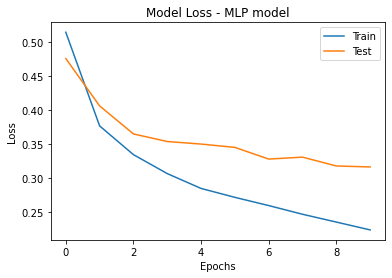

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss - MLP model")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()

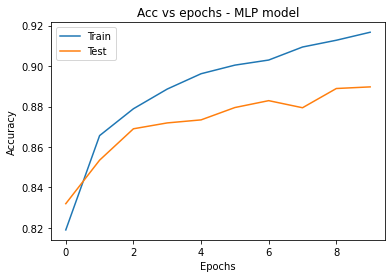

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Acc vs epochs - MLP model")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()

In [18]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.title("Confusion matrix- MLP model")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

313/313 [==============================] - 1s 2ms/step


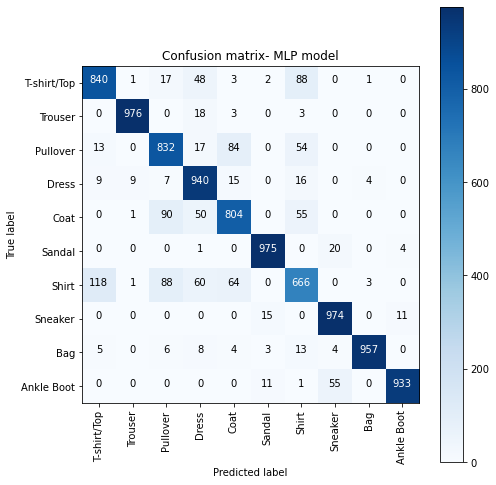

In [19]:
# Predict the values from the validation dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
fig, ax = plt.subplots(figsize=(7, 7))
plot_confusion_matrix(confusion_mtx, 
            classes = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot'])

In [20]:
# Convolutional Neural Network (using the default image format)
import tensorflow as tf
import tensorflow.keras as keras
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import to_categorical

# The newer Keras 2.X API for backend uses the image_data_format
# For 2D data (e.g. image), 
# "channels_last" assumes (rows, cols, channels) 
# while 
# "channels_first" assumes (channels, rows, cols).
# K.set_image_data_format('channels_last')

# fix random seed for reproducibility
seed = 1
numpy.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# reshape to be [samples][rows][columns][pixels]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
inputShape = (28,28,1)

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

# build the model
# create model
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=inputShape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
          epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 - 9s - loss: 0.5180 - accuracy: 0.8171 - val_loss: 0.3886 - val_accuracy: 0.8673 - 9s/epoch - 30ms/step
Epoch 2/10
300/300 - 8s - loss: 0.3483 - accuracy: 0.8777 - val_loss: 0.3446 - val_accuracy: 0.8778 - 8s/epoch - 28ms/step
Epoch 3/10
300/300 - 8s - loss: 0.3119 - accuracy: 0.8897 - val_loss: 0.3275 - val_accuracy: 0.8795 - 8s/epoch - 28ms/step
Epoch 4/10
300/300 - 8s - loss: 0.2826 - accuracy: 0.8998 - val_loss: 0.2974 - val_accuracy: 0.8942 - 8s/epoch - 27ms/step
Epoch 5/10
300/300 - 8s - loss: 0.2598 - accuracy: 0.9066 - val_loss: 0.2857 - val_accuracy: 0.8972 - 8s/epoch - 28ms/step
Epoch 6/10
300/300 - 8s - loss: 0.2431 - accuracy: 0.9110 - val_loss: 0.2730 - val_accuracy: 0.9021 - 8s/epoch - 28ms/step
Epoch 7/10
300/300 - 9s - loss: 0.2299 - accuracy: 0.9177 - val_loss: 0.2656 - val_accuracy: 0.9036 - 9s/epoch - 29ms/step
Epoch 8/10
300/300 - 9s - loss: 0.2153 - accuracy: 0.9207 - val_loss: 0.2587 - val_accuracy: 0.9052 - 9s/epoch - 29ms/step
Epoch 9/10
300/3

In [21]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 12, 12, 32)        0         
                                                                 
 flatten_6 (Flatten)         (None, 4608)              0         
                                                                 
 dense_14 (Dense)            (None, 128)               589952    
                                                                 
 dense_15 (Dense)            (None, 10)                1290      
                                                      

In [22]:
score = model.evaluate(X_test, y_test)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.2609 - accuracy: 0.9070
Loss: 0.2609
Accuracy: 0.9070


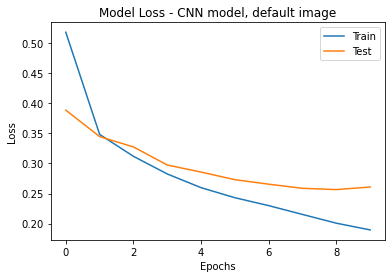

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss - CNN model, default image")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()

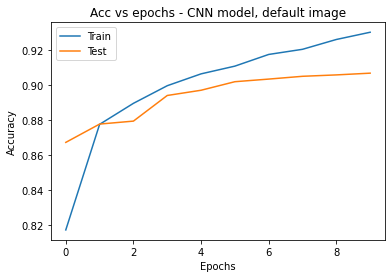

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Acc vs epochs - CNN model, default image")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()

In [25]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.title("Confusion matrix- CNN model, default image")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

313/313 [==============================] - 1s 3ms/step


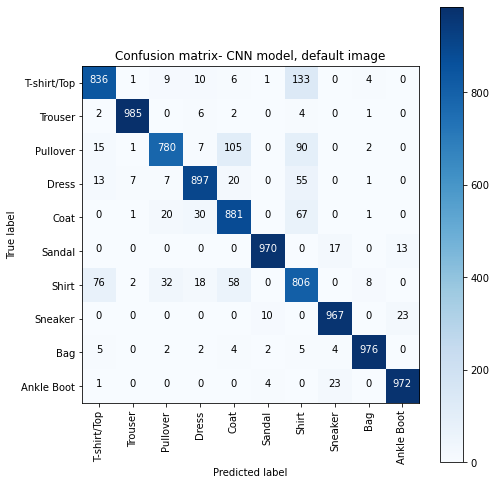

In [26]:
# Predict the values from the validation dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
fig, ax = plt.subplots(figsize=(7, 7))
plot_confusion_matrix(confusion_mtx, 
            classes = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot'])

In [27]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import to_categorical

# build the model
# create model
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
          batch_size=200, epochs=10, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 - 8s - loss: 0.5044 - accuracy: 0.8250 - val_loss: 0.3827 - val_accuracy: 0.8661 - 8s/epoch - 25ms/step
Epoch 2/10
300/300 - 7s - loss: 0.3348 - accuracy: 0.8820 - val_loss: 0.3448 - val_accuracy: 0.8778 - 7s/epoch - 23ms/step
Epoch 3/10
300/300 - 7s - loss: 0.2887 - accuracy: 0.8968 - val_loss: 0.3041 - val_accuracy: 0.8951 - 7s/epoch - 23ms/step
Epoch 4/10
300/300 - 7s - loss: 0.2606 - accuracy: 0.9064 - val_loss: 0.2831 - val_accuracy: 0.8992 - 7s/epoch - 23ms/step
Epoch 5/10
300/300 - 7s - loss: 0.2395 - accuracy: 0.9123 - val_loss: 0.2638 - val_accuracy: 0.9059 - 7s/epoch - 23ms/step
Epoch 6/10
300/300 - 7s - loss: 0.2202 - accuracy: 0.9202 - val_loss: 0.2727 - val_accuracy: 0.9024 - 7s/epoch - 23ms/step
Epoch 7/10
300/300 - 7s - loss: 0.2055 - accuracy: 0.9250 - val_loss: 0.2565 - val_accuracy: 0.9073 - 7s/epoch - 24ms/step
Epoch 8/10
300/300 - 7s - loss: 0.1918 - accuracy: 0.9309 - val_loss: 0.2647 - val_accuracy: 0.9050 - 7s/epoch - 25ms/step
Epoch 9/10
300/3

In [28]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 flatten_7 (Flatten)         (None, 4608)              0         
                                                                 
 dense_16 (Dense)            (None, 128)               589952    
                                                                 
 dense_17 (Dense)            (None, 10)                1290      
                                                                 
Total params: 592,074
Trainable params: 592,074
Non-trainable params: 0
________________________________________________

In [29]:
score = model.evaluate(X_test, y_test)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.2505 - accuracy: 0.9137
Loss: 0.2505
Accuracy: 0.9137


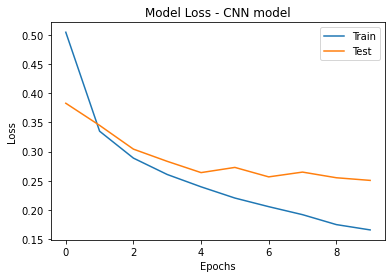

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss - CNN model")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()

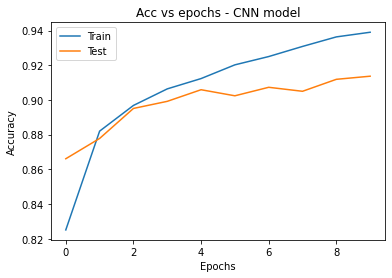

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Acc vs epochs - CNN model")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()

In [32]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.title("Confusion matrix- CNN model")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

313/313 [==============================] - 1s 3ms/step


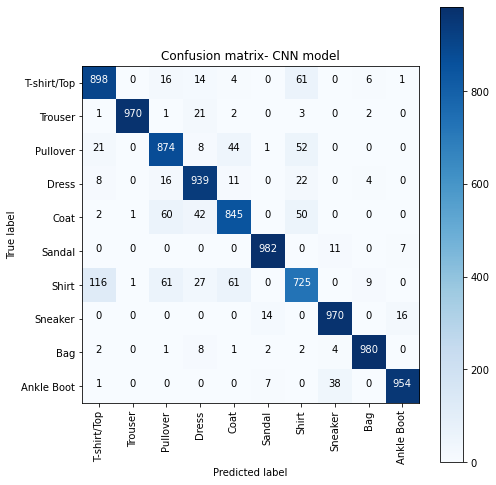

In [33]:
# Predict the values from the validation dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
fig, ax = plt.subplots(figsize=(7, 7))
plot_confusion_matrix(confusion_mtx, 
            classes = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot'])

In [34]:
# Convolutional Neural Network (using the default image format)
import tensorflow as tf
import tensorflow.keras as keras
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import to_categorical

# The newer Keras 2.X API for backend uses the image_data_format
# For 2D data (e.g. image), 
# "channels_last" assumes (rows, cols, channels) 
# while 
# "channels_first" assumes (channels, rows, cols).
# K.set_image_data_format('channels_last')

# fix random seed for reproducibility
seed = 1
numpy.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# reshape to be [samples][rows][columns][pixels]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
inputShape = (28,28,1)

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

# build the model
# create model
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=inputShape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
          epochs=30, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/30
300/300 - 9s - loss: 0.5195 - accuracy: 0.8191 - val_loss: 0.3801 - val_accuracy: 0.8682 - 9s/epoch - 30ms/step
Epoch 2/30
300/300 - 9s - loss: 0.3515 - accuracy: 0.8752 - val_loss: 0.3247 - val_accuracy: 0.8875 - 9s/epoch - 29ms/step
Epoch 3/30
300/300 - 9s - loss: 0.3117 - accuracy: 0.8891 - val_loss: 0.3018 - val_accuracy: 0.8928 - 9s/epoch - 29ms/step
Epoch 4/30
300/300 - 9s - loss: 0.2884 - accuracy: 0.8959 - val_loss: 0.2844 - val_accuracy: 0.8962 - 9s/epoch - 29ms/step
Epoch 5/30
300/300 - 9s - loss: 0.2692 - accuracy: 0.9026 - val_loss: 0.2829 - val_accuracy: 0.8977 - 9s/epoch - 28ms/step
Epoch 6/30
300/300 - 9s - loss: 0.2547 - accuracy: 0.9071 - val_loss: 0.2744 - val_accuracy: 0.9004 - 9s/epoch - 30ms/step
Epoch 7/30
300/300 - 10s - loss: 0.2418 - accuracy: 0.9112 - val_loss: 0.2587 - val_accuracy: 0.9071 - 10s/epoch - 34ms/step
Epoch 8/30
300/300 - 11s - loss: 0.2306 - accuracy: 0.9150 - val_loss: 0.2594 - val_accuracy: 0.9060 - 11s/epoch - 35ms/step
Epoch 9/30
3

In [35]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 12, 12, 32)        0         
                                                                 
 flatten_8 (Flatten)         (None, 4608)              0         
                                                                 
 dense_18 (Dense)            (None, 128)               589952    
                                                                 
 dense_19 (Dense)            (None, 10)                1290      
                                                      

In [36]:
score = model.evaluate(X_test, y_test)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.2573 - accuracy: 0.9227
Loss: 0.2573
Accuracy: 0.9227


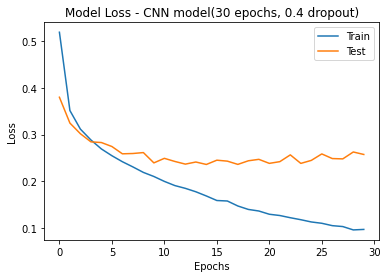

In [37]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss - CNN model(30 epochs, 0.4 dropout)")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()

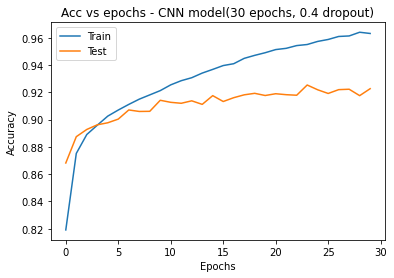

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Acc vs epochs - CNN model(30 epochs, 0.4 dropout)")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()

In [41]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.title("Confusion matrix- CNN model(30 epochs, 0.4 dropout)")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

313/313 [==============================] - 1s 4ms/step


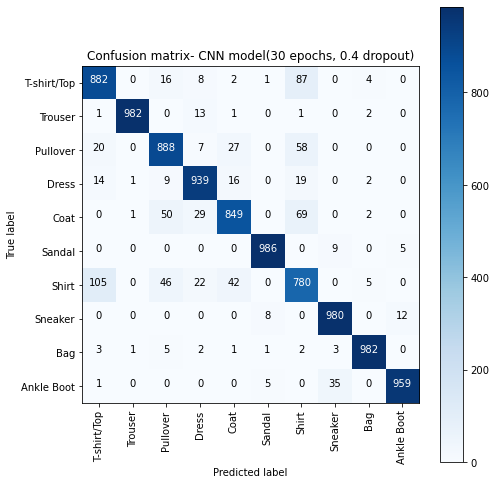

In [42]:
# Predict the values from the validation dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
fig, ax = plt.subplots(figsize=(7, 7))
plot_confusion_matrix(confusion_mtx, 
            classes = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot'])